In [1]:
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('C:\\Users\\srinivas\\Desktop\\Python\\divya.csv')

In [3]:
df.head()

,u_q,coolant,stator_winding,u_d,stator_tooth,motor_speed,i_d,i_q,pm,stator_yoke,ambient,torque,profile_id
0,-0.450682,18.805172,19.086670,-0.350055,18.293219,0.002866,0.004419,0.000328,24.554214,18.316547,19.850691,0.187101,17
1,-0.325737,18.818571,19.092390,-0.305803,18.294807,0.000257,0.000606,-0.000785,24.538078,18.314955,19.850672,0.245417,17
2,-0.440864,18.828770,19.089380,-0.372503,18.294094,0.002355,0.001290,0.000386,24.544693,18.326307,19.850657,0.176615,17
3,-0.327026,18.835567,19.083031,-0.316199,18.292541,0.006105,0.000026,0.002046,24.554018,18.330833,19.850647,0.238303,17
4,-0.471150,18.857033,19.082525,-0.332272,18.291428,0.003133,-0.064317,0.037184,24.565397,18.326662,19.850639,0.208197,17


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 13 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   u_q             1048575 non-null  float64
 1   coolant         1048575 non-null  float64
 2   stator_winding  1048575 non-null  float64
 3   u_d             1048575 non-null  float64
 4   stator_tooth    1048575 non-null  float64
 5   motor_speed     1048575 non-null  float64
 6   i_d             1048575 non-null  float64
 7   i_q             1048575 non-null  float64
 8   pm              1048575 non-null  float64
 9   stator_yoke     1048575 non-null  float64
 10  ambient         1048575 non-null  float64
 11  torque          1048575 non-null  float64
 12  profile_id      1048575 non-null  int64  
dtypes: float64(12), int64(1)
memory usage: 104.0 MB


In [5]:
df_test=df[(df['profile_id']==65)|(df['profile_id']==72)]
df=df[(df['profile_id']!=65)&(df['profile_id']!=72)]
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21382 entries, 984807 to 1048574
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   u_q             21382 non-null  float64
 1   coolant         21382 non-null  float64
 2   stator_winding  21382 non-null  float64
 3   u_d             21382 non-null  float64
 4   stator_tooth    21382 non-null  float64
 5   motor_speed     21382 non-null  float64
 6   i_d             21382 non-null  float64
 7   i_q             21382 non-null  float64
 8   pm              21382 non-null  float64
 9   stator_yoke     21382 non-null  float64
 10  ambient         21382 non-null  float64
 11  torque          21382 non-null  float64
 12  profile_id      21382 non-null  int64  
dtypes: float64(12), int64(1)
memory usage: 2.3 MB


In [6]:
df.describe()

,u_q,coolant,stator_winding,u_d,stator_tooth,motor_speed,i_d,i_q,pm,stator_yoke,ambient,torque,profile_id
count,1.027193e+06,1.027193e+06,1.027193e+06,1.027193e+06,1.027193e+06,1.027193e+06,1.027193e+06,1.027193e+06,1.027193e+06,1.027193e+06,1.027193e+06,1.027193e+06,1.027193e+06
mean,5.342871e+01,3.203073e+01,6.424908e+01,-2.959749e+01,5.428262e+01,2.215954e+03,-7.122702e+01,4.424921e+01,5.688516e+01,4.507733e+01,2.422682e+01,3.701980e+01,3.477765e+01
std,4.328535e+01,2.012822e+01,2.983568e+01,6.208254e+01,2.330966e+01,1.873792e+03,6.669854e+01,9.139036e+01,2.016425e+01,1.947126e+01,1.956893e+00,7.656265e+01,2.481054e+01
min,-2.529093e+01,1.376190e+01,1.858582e+01,-1.315304e+02,1.813398e+01,-2.755491e+02,-2.780036e+02,-2.934268e+02,2.085696e+01,1.807669e+01,1.410069e+01,-2.464667e+02,2.000000e+00
25%,1.211087e+01,1.859818e+01,3.933385e+01,-8.528946e+01,3.298260e+01,4.199913e+02,-1.196442e+02,1.096475e+00,3.860079e+01,2.807102e+01,2.307057e+01,-3.391711e-02,1.300000e+01
50%,4.764710e+01,1.922585e+01,6.349731e+01,-8.162986e+00,5.257306e+01,1.999977e+03,-5.148098e+01,3.125821e+01,5.753148e+01,3.947543e+01,2.405257e+01,2.500000e+01,2.700000e+01
75%,8.753510e+01,4.148173e+01,8.779266e+01,8.035669e-01,7.212174e+01,3.749969e+03,-2.980667e+00,1.132409e+02,7.191040e+01,5.841975e+01,2.597533e+01,9.907306e+01,5.600000e+01
max,1.330313e+02,1.015985e+02,1.413629e+02,1.314698e+02,1.119464e+02,6.000015e+03,5.189670e-02,3.017079e+02,1.136066e+02,9.985647e+01,3.071420e+01,2.610057e+02,8.100000e+01


In [7]:
df.isnull().sum()

u_q               0
coolant           0
stator_winding    0
u_d               0
stator_tooth      0
motor_speed       0
i_d               0
i_q               0
pm                0
stator_yoke       0
ambient           0
torque            0
profile_id        0
dtype: int64

<Axes: xlabel='profile_id'>

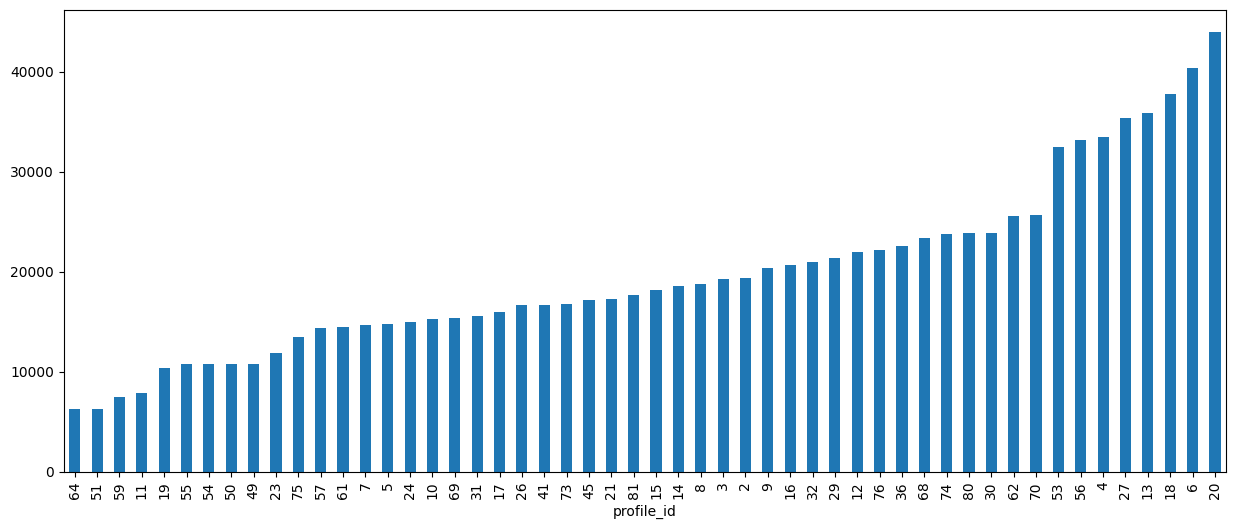

In [8]:
plt.figure(figsize=(15,6))
df['profile_id'].value_counts().sort_values().plot(kind='bar')

In [9]:
df.columns

Index(['u_q', 'coolant', 'stator_winding', 'u_d', 'stator_tooth',
       'motor_speed', 'i_d', 'i_q', 'pm', 'stator_yoke', 'ambient', 'torque',
       'profile_id'],
      dtype='object')

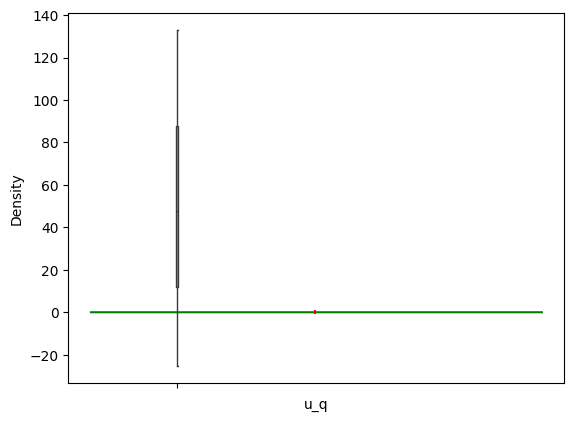

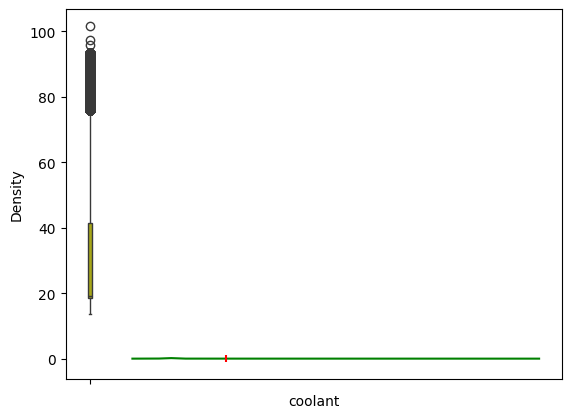

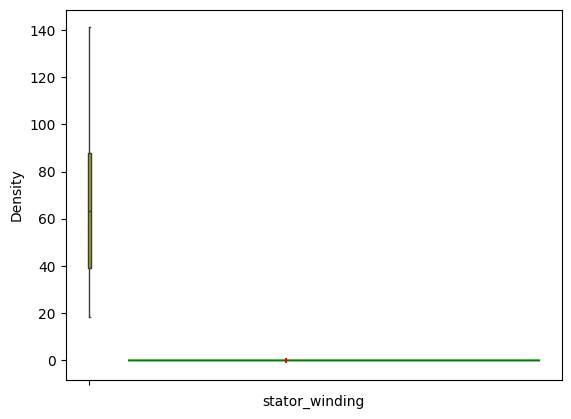

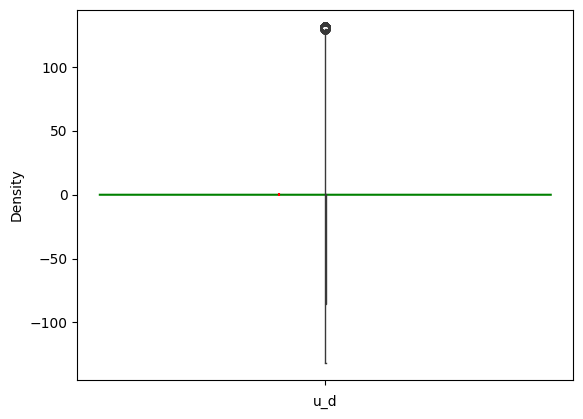

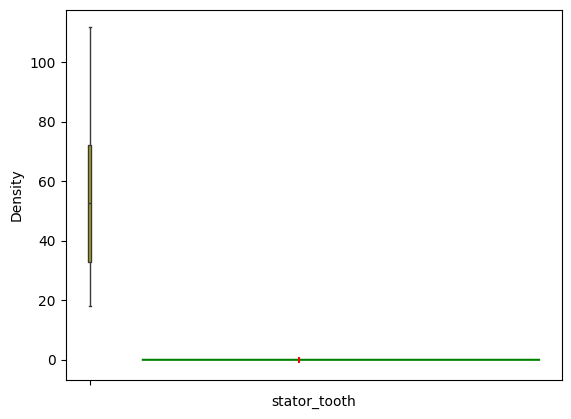

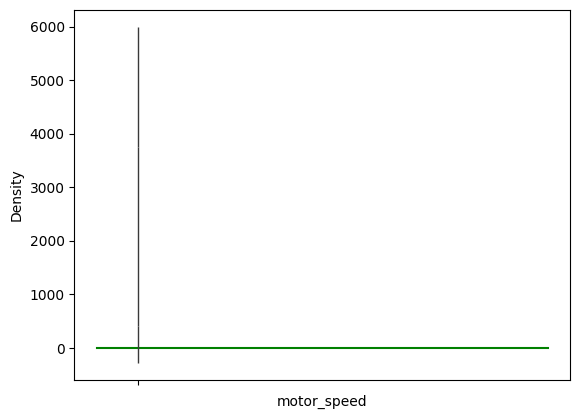

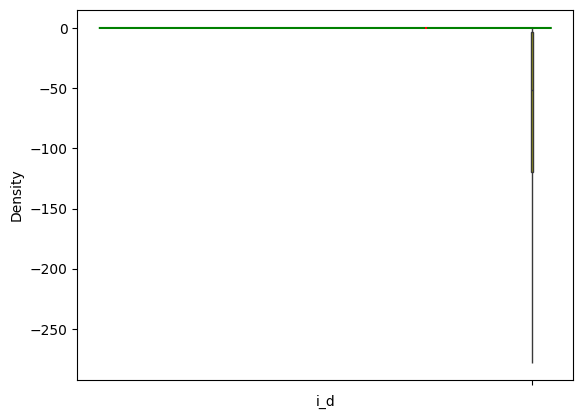

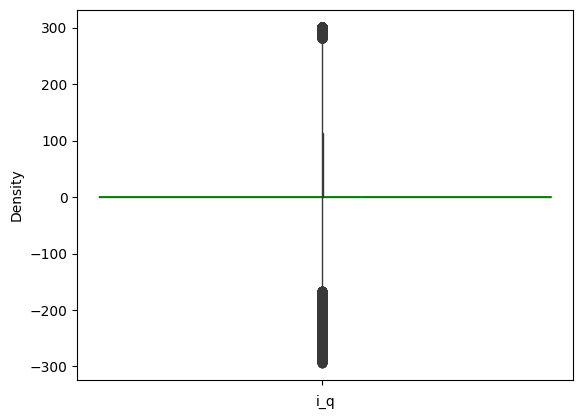

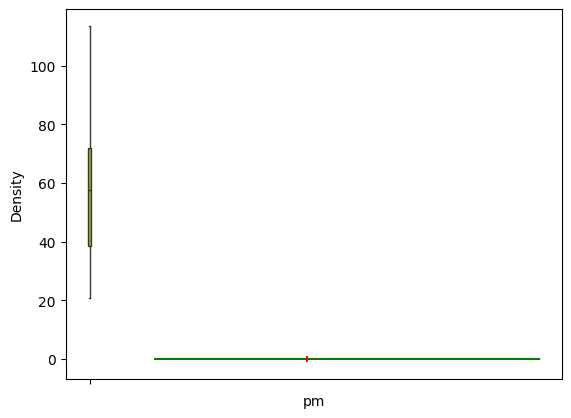

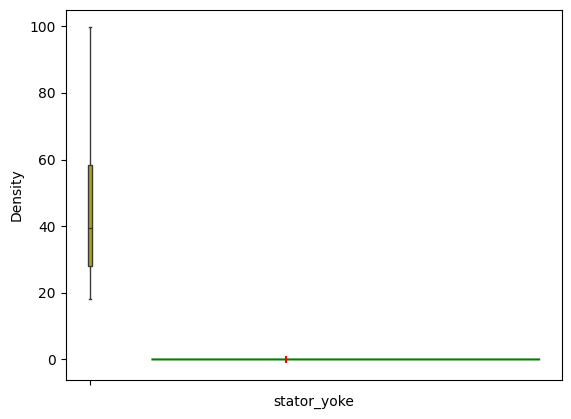

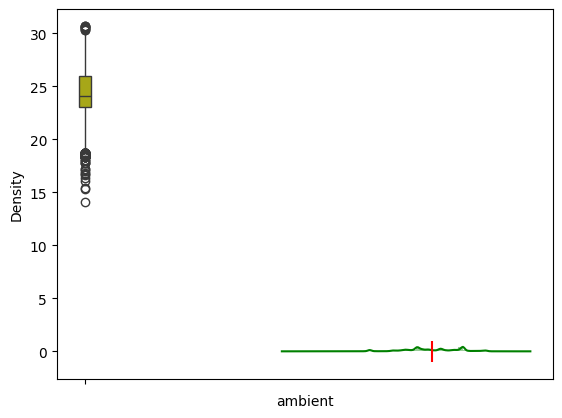

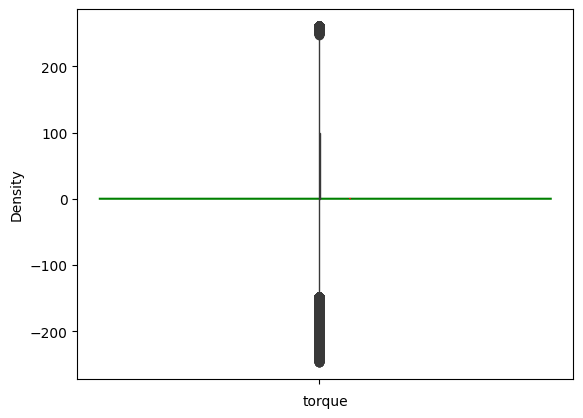

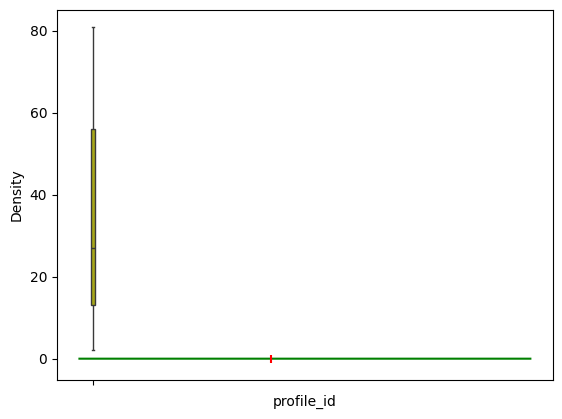

In [10]:
for i in df.columns:
  sns.distplot(df[i],color='g')
  sns.boxplot(df[i],color = 'y')
  plt.vlines(df[i].mean(),ymin = -1,ymax = 1,color = 'r')
  plt.show( )

In [11]:
import scipy.stats as stats
for i in df.columns:
  print(i,' :\nSkew : ',df[i].skew(),' : \nKurtosis : ',df[i].kurt())
  print()

u_q  :
Skew :  0.3733093516002081  : 
Kurtosis :  -1.1754904415806426

coolant  :
Skew :  1.3857293287402865  : 
Kurtosis :  0.7105946725480803

stator_winding  :
Skew :  0.2513813225986658  : 
Kurtosis :  -0.9736227669340138

u_d  :
Skew :  0.13679708793514356  : 
Kurtosis :  -0.2731603058910972

stator_tooth  :
Skew :  0.23940505417955443  : 
Kurtosis :  -1.0486357665830672

motor_speed  :
Skew :  0.42388954473970114  : 
Kurtosis :  -1.1190400265819873

i_d  :
Skew :  -0.6861751806716729  : 
Kurtosis :  -0.6398539997452017

i_q  :
Skew :  -0.22179306602139096  : 
Kurtosis :  0.7670180257441213

pm  :
Skew :  0.19071338541231941  : 
Kurtosis :  -0.8606011612505644

stator_yoke  :
Skew :  0.6211321549975989  : 
Kurtosis :  -0.47410376465982607

ambient  :
Skew :  -0.20380752324806148  : 
Kurtosis :  -0.37571756216405605

torque  :
Skew :  -0.1966608319255495  : 
Kurtosis :  0.7582512529833232

profile_id  :
Skew :  0.4275758456933832  : 
Kurtosis :  -1.2378848551097315



<Axes: >

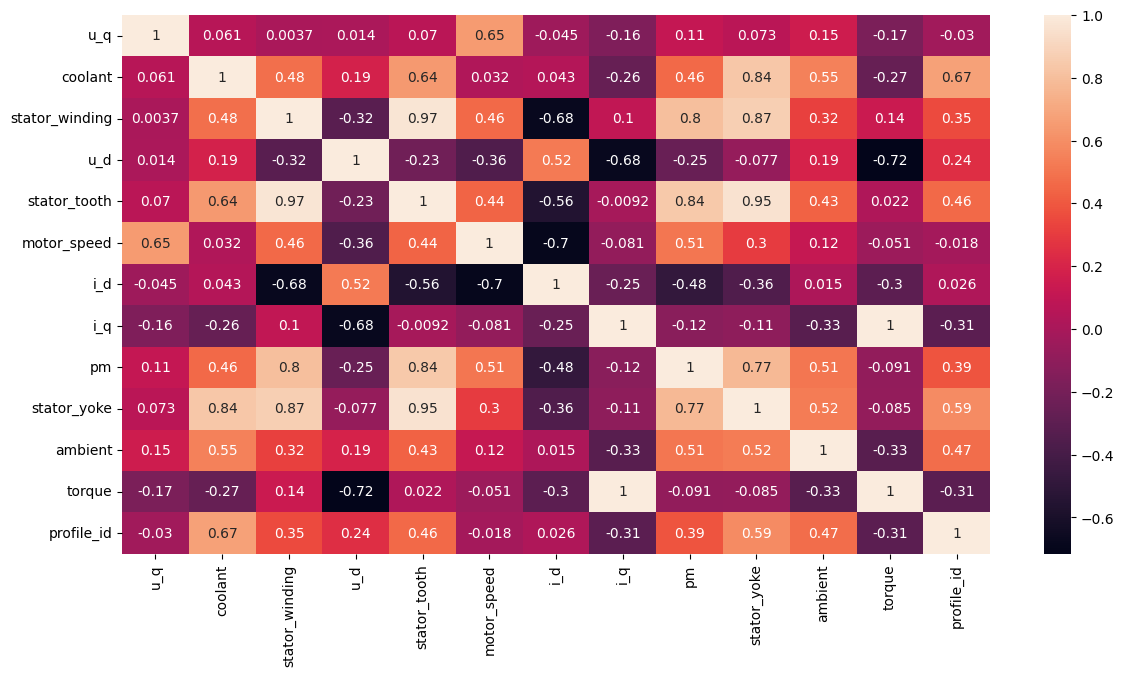

In [12]:
plt.figure(figsize=(14,7))
sns.heatmap(df.corr(),annot=True)

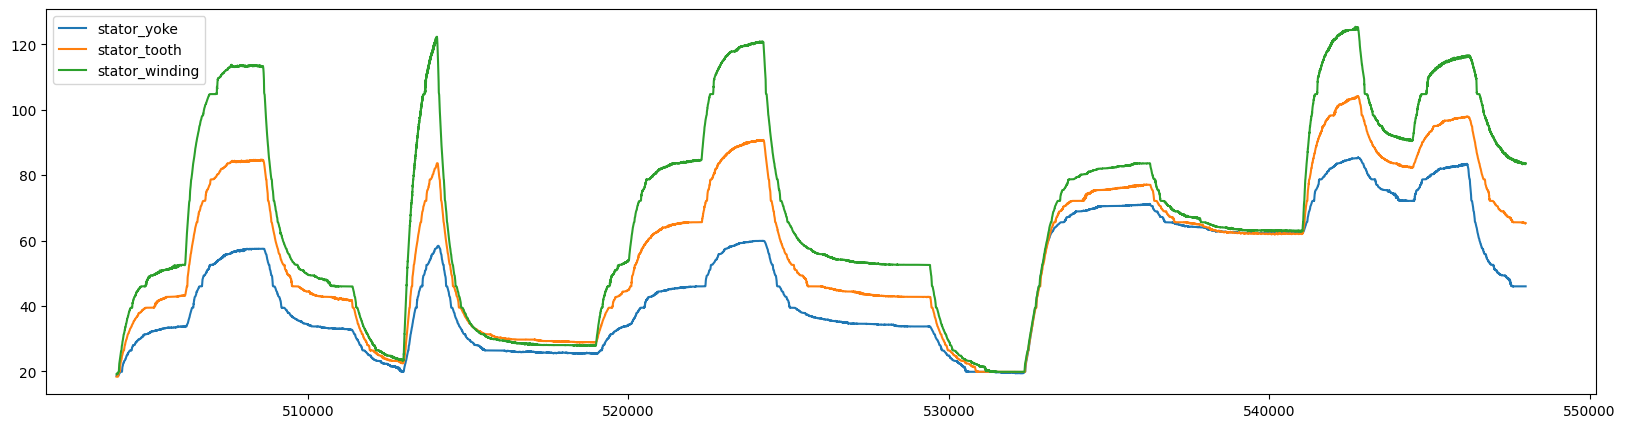

In [13]:
plt.figure(figsize=(20,5))
df[df['profile_id'] == 20]['stator_yoke'].plot(label = 'stator_yoke')
df[df['profile_id'] == 20]['stator_tooth'].plot(label = 'stator_tooth')
df[df['profile_id'] == 20]['stator_winding'].plot(label = 'stator_winding')
plt.legend();


In [14]:
df.drop('profile_id',axis = 1,inplace=True)
df_test.drop('profile_id',axis = 1,inplace=True)


BartlettResult(statistic=3387226.066117458, pvalue=0.0)

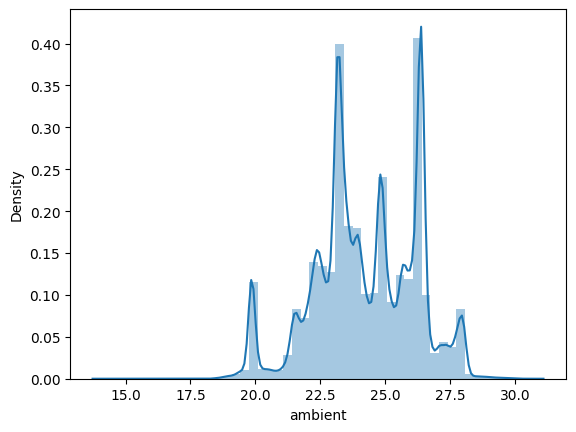

In [15]:
sns.distplot(df['ambient'])
from scipy.stats import shapiro
shapiro(df['ambient'])
shapiro(df['pm'])
from scipy.stats import bartlett
bartlett(df['ambient'],df['pm'])


BartlettResult(statistic=3.284519969780759, pvalue=0.06993607635037313)

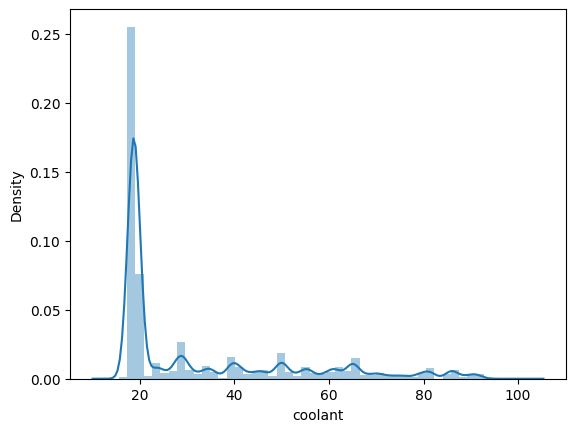

In [16]:
sns.distplot(df['coolant'])
from scipy.stats import shapiro
shapiro(df['coolant'])
shapiro(df['pm'])
from scipy.stats import bartlett
bartlett(df['coolant'],df['pm'])

BartlettResult(statistic=1092312.0031922432, pvalue=0.0)

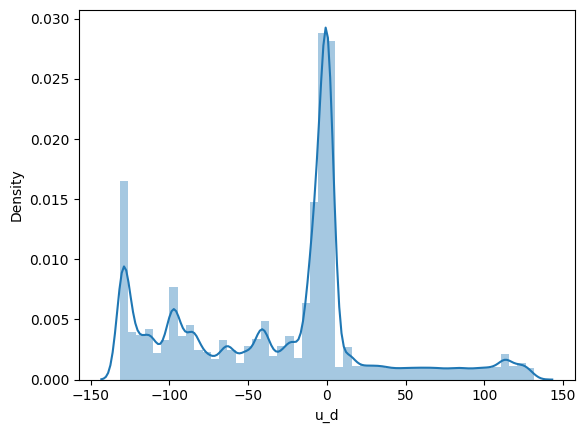

In [17]:
sns.distplot(df['u_d'])
from scipy.stats import shapiro
shapiro(df['u_d'])
shapiro(df['pm'])
from scipy.stats import bartlett
bartlett(df['u_d'],df['pm'])

BartlettResult(statistic=548836.8777017295, pvalue=0.0)

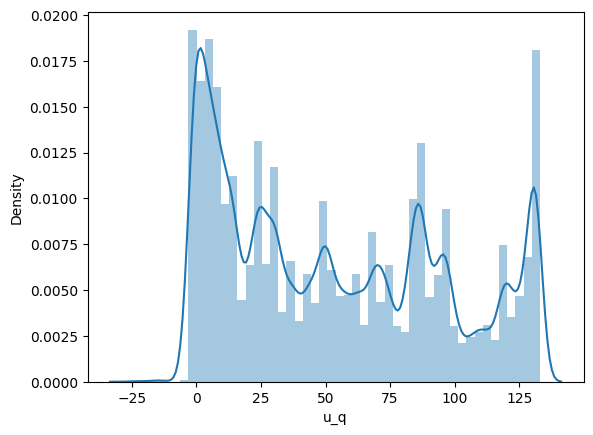

In [18]:
sns.distplot(df['u_q'])
from scipy.stats import shapiro
shapiro(df['u_q'])
shapiro(df['pm'])
from scipy.stats import bartlett
bartlett(df['u_q'],df['pm'])



BartlettResult(statistic=7886318.0643826425, pvalue=0.0)

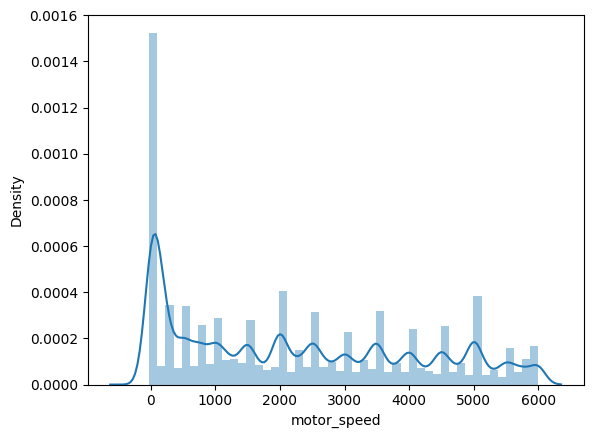

In [19]:
sns.distplot(df['motor_speed'])
from scipy.stats import shapiro
shapiro(df['motor_speed'])
shapiro(df['pm'])
from scipy.stats import bartlett
bartlett(df['motor_speed'],df['pm'])

BartlettResult(statistic=1213284.2109318068, pvalue=0.0)

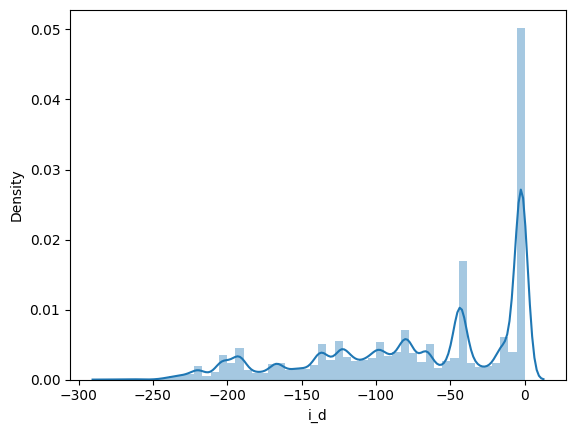

In [20]:
sns.distplot(df['i_d'])
from scipy.stats import shapiro
shapiro(df['i_d'])
shapiro(df['pm'])
from scipy.stats import bartlett
bartlett(df['i_d'],df['pm'])

BartlettResult(statistic=1778305.5706813629, pvalue=0.0)

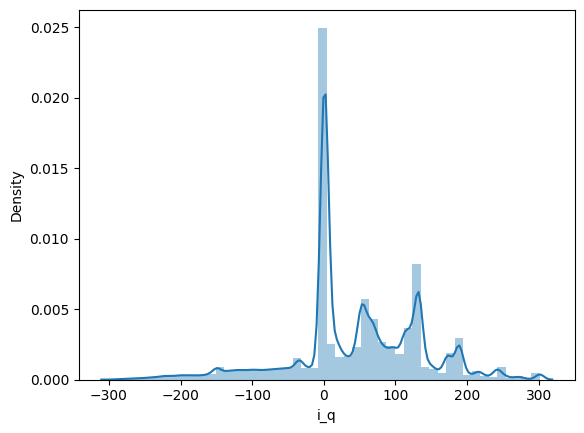

In [21]:
sns.distplot(df['i_q'])
from scipy.stats import shapiro
shapiro(df['i_q'])
shapiro(df['pm'])
from scipy.stats import bartlett
bartlett(df['i_q'],df['pm'])

In [22]:
df = df.sample(frac=1,random_state=3)
df.head()

,u_q,coolant,stator_winding,u_d,stator_tooth,motor_speed,i_d,i_q,pm,stator_yoke,ambient,torque
921627,119.852495,18.629679,61.552981,53.742341,52.571411,3766.192746,-69.342703,-43.193314,63.672889,39.293092,26.428982,-3.665140e+01
922111,50.954991,19.940663,62.577834,-119.569967,51.211423,4723.046324,-173.616906,73.718120,62.617134,37.991211,26.873190,7.028635e+01
72214,34.245537,18.939732,62.328861,-126.906837,49.464222,3840.649658,-190.379974,100.981758,53.398201,37.895550,22.540123,9.703141e+01
259865,4.857759,18.763554,121.468330,-130.658997,89.318825,3499.968750,-220.312042,113.905045,92.309296,60.627037,22.726572,1.114575e+02
1035352,1.191944,28.212442,28.501744,0.321393,27.852829,0.005216,-2.001172,1.095821,37.271819,27.151434,24.009486,-3.705492e-320


<Axes: xlabel='i_q', ylabel='pm'>

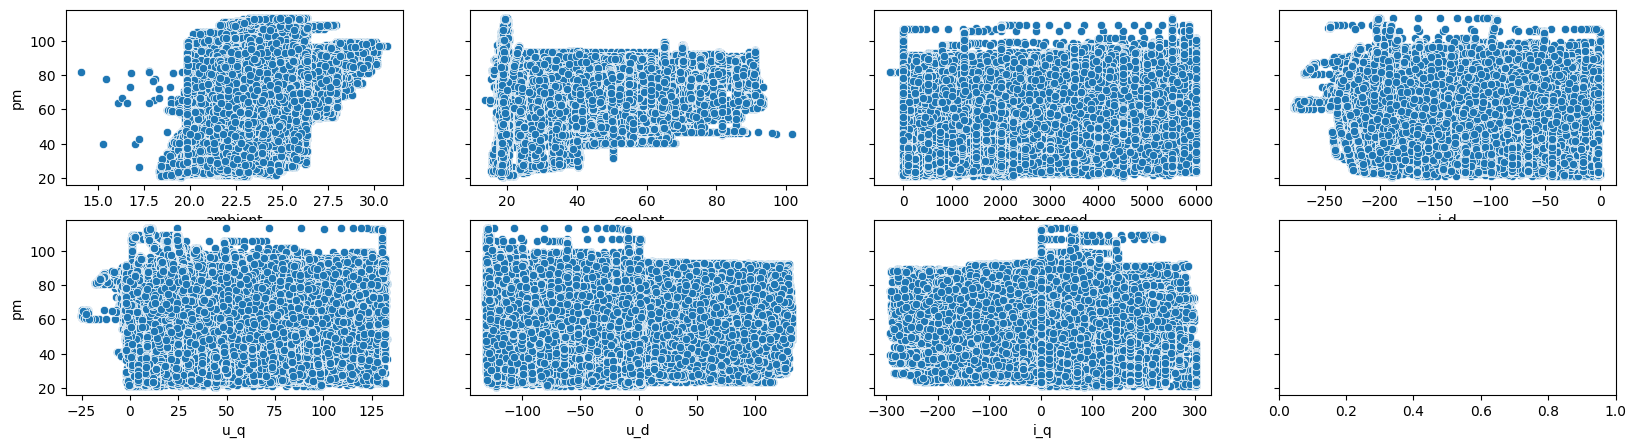

In [23]:
fig, axes = plt.subplots(2, 4, figsize=(20, 5),sharey=True)
sns.scatterplot(x=df['ambient'], y=df['pm'], ax=axes[0][0])
sns.scatterplot(x=df['coolant'], y=df['pm'], ax=axes[0][1])
sns.scatterplot(x=df['motor_speed'], y=df['pm'], ax=axes[0][2])
sns.scatterplot(x=df['i_d'], y=df['pm'], ax=axes[0][3])
sns.scatterplot(x=df['u_q'], y=df['pm'], ax=axes[1][0])
sns.scatterplot(x=df['u_d'], y=df['pm'], ax=axes[1][1])
sns.scatterplot(x=df['i_q'], y=df['pm'], ax=axes[1][2])


In [24]:
from sklearn.preprocessing import MinMaxScaler
mm=MinMaxScaler()
X = df[['ambient', 'coolant', 'u_d', 'u_q', 'motor_speed', 'i_d', 'i_q']]
X=mm.fit_transform(X)
X_df_test = df_test[['ambient', 'coolant', 'u_d', 'u_q', 'motor_speed', 'i_d', 'i_q']]
X_df_test=mm.fit_transform(X_df_test)
y=df['pm']
y_df_test=df_test['pm']
X=pd.DataFrame(X,columns=['ambient','coolant','u_d','u_q','motor_speed','i_d','i_q'])
y.reset_index(drop=True,inplace=True)
y_df_test.reset_index(drop=True,inplace=True)
print(X.shape)
print(X_df_test.shape)

(1027193, 7)
(21382, 7)


In [25]:
import joblib
joblib.dump(mm,'transform.save')

['transform.save']

In [26]:
X=X.values
y=y.values
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=3)

In [27]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(X_train,y_train)
y_pred=lr.predict(X_test)


In [28]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test,y_pred)
mean_squared_error(y_test, y_pred, squared=False)


12.077076138766541

In [29]:
X_train.shape
joblib.dump(lr,"model.save")

['model.save']

In [30]:
X_test[0]
X_train[0]
p=[[-0.75214297, -1.1184461, 0.3279352, -1.2978575, -1.2224282, 1.0295724,
-0.24586003]]
lr.predict(mm.transform(p))

array([-80.01777776])